In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import acf, pacf, plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA

## load DataSet

In [2]:
path = 'D:\work\Te Data task\Retail Data Analytics - Data'
sales = pd.read_csv(path+'\sales data-set.csv')
store = pd.read_csv(path+'\stores data-set.csv')
features = pd.read_csv(path+'\Features data set.csv')

In [3]:
df = sales.merge(features,how="left", on=['Store', 'Date', 'IsHoliday'])
df = df.merge(store, how= "left", on=['Store'])
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


## get data of store 20 

In [59]:
df20=df.where( df['Store'] == 20)
df20['Date'] = pd.to_datetime(df20['Date'])
#df20 = df20.sort_values(['Date'])#.groupby('Date',as_index=False)['Weekly_Sales'].sum()
df20=df20.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
df20 = df20.set_index('Date')
df20.head()

,IsHoliday,Weekly_Sales
Date,,
2010-01-10,0.0,1933719.21
2010-02-04,0.0,2405395.22
2010-02-07,0.0,2143676.77
2010-02-19,0.0,2161549.76
2010-02-26,0.0,1898193.95


In [49]:
df20.tail()

,Weekly_Sales
Date,
2012-10-08,2144245.39
2012-10-19,1999363.49
2012-10-26,2031650.55
2012-11-05,2168097.11
2012-12-10,2162951.36


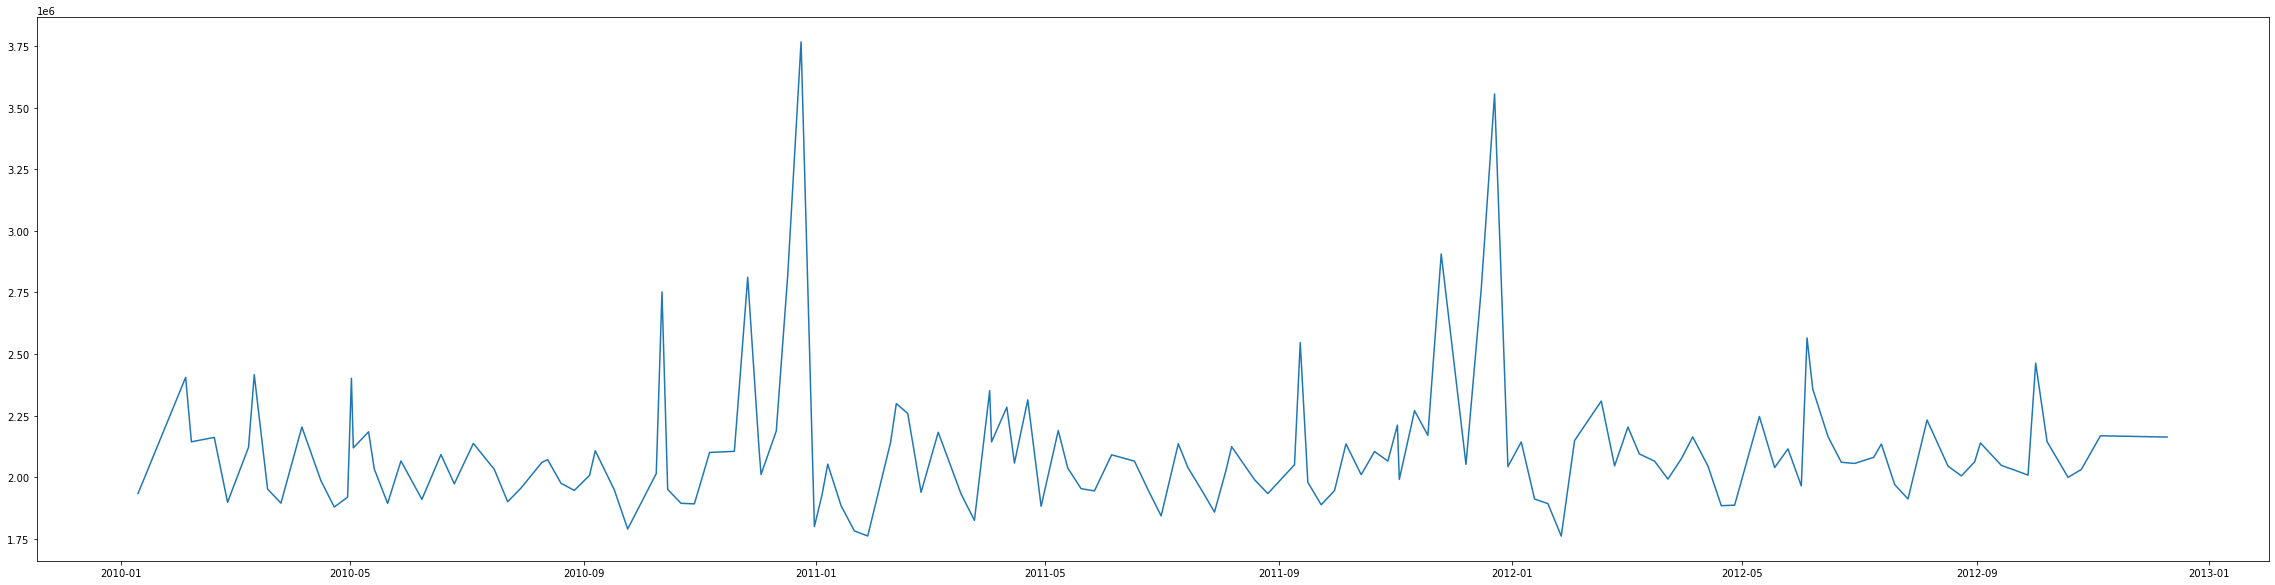

In [50]:
plt.figure(figsize=(40,10))
plt.plot(df20.index, df20.Weekly_Sales)
plt.show()

## test if data is stationary or not 

In [51]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data stationary")
    else:
        print("weak evidence against null hypothesis, Data is non-stationary ")

In [52]:
adfuller_test(df20.Weekly_Sales)

ADF Test Statistic : -9.804395784660617
p-value : 5.878593367625922e-17
#Lags Used : 0
Number of Observations Used : 142
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data stationary


## plot acf & pacf

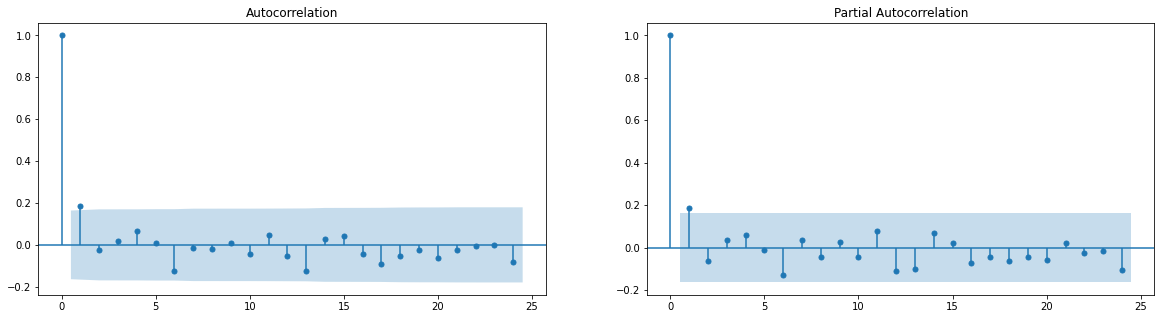

In [53]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
plot_acf(df20.Weekly_Sales, lags=24, alpha=0.05, ax=axes[0])
plot_pacf(df20.Weekly_Sales, lags=24, alpha=0.05, ax=axes[1])
plt.show()

## try arima 

In [54]:
from pmdarima import auto_arima
auto_arima(df20['Weekly_Sales'], Trace=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1991.104
Date:                Sat, 16 Jul 2022   AIC                           3988.207
Time:                        08:48:46   BIC                           3997.096
Sample:                             0   HQIC                          3991.819
                                - 143                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.104e+06    3.4e+04     61.838      0.000    2.04e+06    2.17e+06
ma.L1          0.2063      0.051      4.067      0.000       0.107       0.306
sigma2      7.458e+10      0.143    5.2e+11      0.000    7.46e+10    7.46e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               766.71
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                             2.59
Prob(H) (two-sided):                  0.35   Kurtosis:                        13.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.88e+26. Standard errors may be unstable.
"""

## now split data and fit model with  p =0 , d=0 , q =1 which mean it will be arma mode only MA 

In [55]:
print(df20.shape)
train=df20.iloc[:-30]
test=df20.iloc[-30:]
print(train.shape,test.shape)

(143, 1)
(113, 1) (30, 1)


In [56]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['Weekly_Sales'],order=(0, 0, 1))
results=model.fit()
results.summary()

C:\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  113
Model:                     ARMA(0, 1)   Log Likelihood               -1582.840
Method:                       css-mle   S.D. of innovations         293106.887
Date:                Sat, 16 Jul 2022   AIC                           3171.679
Time:                        08:48:57   BIC                           3179.861
Sample:                             0   HQIC                          3174.999
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                2.11e+06   3.33e+04     63.341      0.000    2.04e+06    2.17e+06
ma.L1.Weekly_Sales     0.2097      0.095      2.215      0.027       0.024       0.395
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -4.7689           +0.0000j            4.7689            0.5000
-----------------------------------------------------------------------------
"""

In [31]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Weekly_Sales']))
print(rmse)

151993.72937707772


## try to add seasonal and use sarimax 

In [73]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
auto_arima(df20['Weekly_Sales'], seasonal=True, m=48, trace=True).summary() #auto arima gives the best fit

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[48] intercept   : AIC=3998.061, Time=4.58 sec
 ARIMA(0,0,0)(0,0,0)[48] intercept   : AIC=3991.763, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[48] intercept   : AIC=3990.678, Time=1.69 sec
 ARIMA(0,0,1)(0,0,1)[48] intercept   : AIC=3990.203, Time=0.52 sec
 ARIMA(0,0,0)(0,0,0)[48]             : AIC=4574.703, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[48] intercept   : AIC=3988.207, Time=0.03 sec
 ARIMA(0,0,1)(1,0,0)[48] intercept   : AIC=3990.189, Time=1.57 sec
 ARIMA(0,0,1)(1,0,1)[48] intercept   : AIC=3992.186, Time=1.25 sec
 ARIMA(1,0,1)(0,0,0)[48] intercept   : AIC=3990.538, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[48] intercept   : AIC=3990.131, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[48] intercept   : AIC=3988.692, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[48] intercept   : AIC=3992.100, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[48]             : AIC=4479.094, Time=0.03 sec

Best model:  ARIMA(0,0,1)(0,0,0)[48] intercept
Total fit time: 9.901 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1991.104
Date:                Sat, 16 Jul 2022   AIC                           3988.207
Time:                        09:03:04   BIC                           3997.096
Sample:                             0   HQIC                          3991.819
                                - 143                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.104e+06    3.4e+04     61.838      0.000    2.04e+06    2.17e+06
ma.L1          0.2063      0.051      4.067      0.000       0.107       0.306
sigma2      7.458e+10      0.143    5.2e+11      0.000    7.46e+10    7.46e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               766.71
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                             2.59
Prob(H) (two-sided):                  0.35   Kurtosis:                        13.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.88e+26. Standard errors may be unstable.
"""

In [74]:
model = SARIMAX(train['Weekly_Sales'], order=(0,0,1),seasonal_order=(0, 0, 1, 48))
res = model.fit()

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


In [75]:
prediction=res.predict(start=113,end=142)

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [76]:
rmse2=sqrt(mean_squared_error(prediction,test['Weekly_Sales']))
print(rmse2)

1692017.2430406045


# the results is not good enough so i will try to use machine learning models in the next notebook 